# LGM Intern

# Task-3 (Advance level task)

# TOPIC:- Develop A Neural Network That Can Read Handwriting

# Name -Khushi Udasi


# Begin your neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN.
# Dataset is taken from MNIST

# Importing the libraries

In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
from keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense,Dropout,Activation ,Flatten,Conv2D,MaxPooling2D

In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape


(60000, 28, 28)

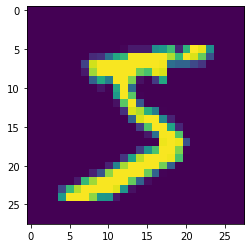

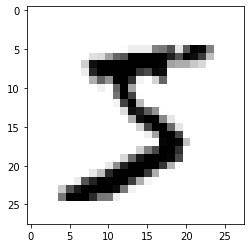

In [5]:
# plotting the first elment of train set
plt.imshow(x_train[0])
plt.show()
# plotting the binary image of the same
plt.imshow(x_train[0],cmap=plt.cm.binary)

# checking the values of each pixel

## before Normalizing

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

# Normalizing the data / pre-processing step

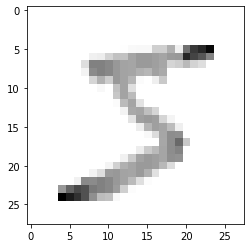

In [7]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

# after Normalizing

In [8]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
print(y_train[0])

5


# resizing image to make it suitable for apply Convolution operation

In [10]:
# increasing one dimension for filter operation
x_train=np.array(x_train).reshape(-1,28,28,1)  ###increasing one dimension for kernel operation
x_test=np.array(x_test).reshape(-1,28,28,1)  ###increasing one dimension for kernel operation
print("Train set Dimension :",x_train.shape)
print("Test set Dimension :",x_test.shape)

Train set Dimension : (60000, 28, 28, 1)
Test set Dimension : (10000, 28, 28, 1)


# Creating a neural network

##Training on 60,000 samples of MNIST handwritten dataset

In [11]:
model=Sequential()

# 1st convolution layer
model.add(Conv2D(64,(3,3),input_shape=x_train.shape[1:])) #only for one convolution layer
model.add(Activation('relu'))  #Activation function to make it non-linear
model.add(MaxPooling2D(pool_size=(2,2))) #maxpooling single maximum value of 2X2

# 2nd convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd convolution layer 
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# 1st fully connected layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

# 2nd fully connected layer
model.add(Dense(32))
model.add(Activation('relu'))

# final fully connected layer
model.add(Dense(10))
model.add(Activation('softmax'))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [13]:
print("Total training Samples= ",len(x_train))

Total training Samples=  60000


In [14]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam", metrics=['accuracy'])

In [15]:
len(x_train)

60000

In [16]:
model.fit(x_train,y_train,epochs=5,validation_split=0.3,batch_size=1)

Epoch 1/5
42000/42000 [==============================] - 303s 7ms/step - loss: 0.2303 - accuracy: 0.9300 - val_loss: 0.1676 - val_accuracy: 0.9587
Epoch 2/5
42000/42000 [==============================] - 349s 8ms/step - loss: 0.1175 - accuracy: 0.9685 - val_loss: 0.0995 - val_accuracy: 0.9752
Epoch 3/5
42000/42000 [==============================] - 269s 6ms/step - loss: 0.1001 - accuracy: 0.9744 - val_loss: 0.1184 - val_accuracy: 0.9700
Epoch 4/5
42000/42000 [==============================] - 266s 6ms/step - loss: 0.1002 - accuracy: 0.9748 - val_loss: 0.1011 - val_accuracy: 0.9749
Epoch 5/5
42000/42000 [==============================] - 261s 6ms/step - loss: 0.0966 - accuracy: 0.9773 - val_loss: 0.1262 - val_accuracy: 0.9698


# evaluating the model

In [17]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Test accuracy on samples :",test_acc)
print("Test accuracy on samples :",test_loss)


313/313 [==============================] - 7s 22ms/step - loss: 0.1292 - accuracy: 0.9732
Test accuracy on samples : 0.9732000231742859
Test accuracy on samples : 0.12922638654708862


In [18]:
prediction=model.predict([x_test])
print(prediction[0])

[6.1630040e-32 4.4601051e-19 9.5416250e-17 1.2898987e-20 7.2591017e-26
 7.9551337e-24 0.0000000e+00 1.0000000e+00 3.7238337e-24 2.1267012e-11]


In [19]:
print(np.argmax(prediction[0]))

7


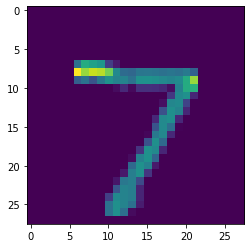

In [20]:
plt.imshow(x_test[0])

In [21]:
print(np.argmax(prediction[128]))

8


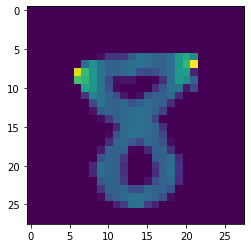

In [22]:
plt.imshow(x_test[128])

In [23]:
img=cv2.imread('five.png')

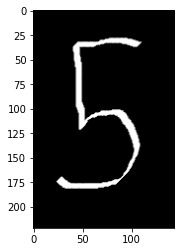

In [24]:
plt.imshow(img)

In [25]:
img.shape

(222, 144, 3)

In [26]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [27]:
gray.shape

(222, 144)

In [28]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [29]:
resized.shape

(28, 28)

In [30]:
newimg= tf.keras.utils.normalize(resized,axis=1) ##0 to 1 scaling

In [31]:
newimg=np.array(newimg).reshape(-1,28,28,1) ##kernel operation of convolution layer

In [32]:
newimg.shape

(1, 28, 28, 1)

In [33]:
prediction=model.predict(newimg)

In [34]:
print(np.argmax(prediction))

5


#  so It predicts number which is written in image